<a href="https://colab.research.google.com/github/JLMuehlbauer/Stroke_Prediction_Classification/blob/main/Stroke_Prediction_JacksonMuehlbauer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prediction**
---
Author: Jackson Muehlbauer

Date: 1/18/2023

---
## Purpose:
The purpose of this project is to predict the likelihood that certain at-risk individuals will have a stroke. This has the potential for certain life-saving treatments or lifestyle changes to be made to lower the likelihood that the predicted person would have a stroke. 


In [1]:
# Imports (for now)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
path = '/content/drive/My Drive/Colab Notebooks/Raw Data/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Exploring Data**
**This section wil involve the following:**
- Deletion unneccesary columns
- Deletion duplicated rows
- Identification and addressing missing values
- Correction of inconsistent/impossible values
- Univariate plots for all features and target
- Identification outliers


In [4]:
for col in df.columns:
  print(f'For feature: {col}')
  print(df[col].nunique(), '\n')

For feature: id
5110 

For feature: gender
3 

For feature: age
104 

For feature: hypertension
2 

For feature: heart_disease
2 

For feature: ever_married
2 

For feature: work_type
5 

For feature: Residence_type
2 

For feature: avg_glucose_level
3979 

For feature: bmi
418 

For feature: smoking_status
4 

For feature: stroke
2 



The 'id' columns will be dropped as this will not be useful for modeling or data exploration. This is because it appears to be a unique value for each row. 

In [5]:
#Dropping 'id' column
df.drop(columns = 'id', inplace = True)
#Verification
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Checking for duplicated rows
df.duplicated().value_counts()

False    5110
dtype: int64

There are no duplicated rows to be dropped.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
df['bmi'].isna().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

There exists 201 missing values for the 'bmi' feature. This will be imputed later (strategy determined later...)

In [9]:
#Checking for impossible values in numerical columns
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


It's unusual for an age to be of type float and the minimum value to be 0.08. That said, there are no impossible values for numeric features. 

In [11]:
pd.set_option('display.max_rows', None)
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
45.00     85
79.00     85
53.00     85
55.00     83
50.00     83
59.00     80
31.00     79
49.00     79
56.00     77
37.00     76
61.00     76
47.00     75
44.00     75
62.00     74
40.00     74
63.00     74
41.00     73
60.00     72
38.00     72
39.00     71
42.00     71
32.00     71
80.00     70
43.00     70
34.00     68
58.00     68
48.00     66
5.00      65
23.00     64
65.00     62
26.00     62
46.00     62
71.00     61
18.00     60
66.00     60
17.00     60
81.00     60
20.00     59
8.00      58
13.00     57
25.00     57
33.00     57
82.00     56
2.00      55
30.00     55
24.00     55
27.00     55
14.00     54
35.00     54
28.00     54
69.00     54
75.00     53
64.00     53
36.00     52
16.00     52
29.00     51
76.00     50
19.00     50
67.00     49
21.00     47
68.00     47
73.00     46
3.00      46
22.00     45
72.00     45
15.00     45
70.00     45
12.00     45
77.00     42
74.00     40
9.00      38
11.00     36

It's strange that there are so many float type values in the age feature, that said, these values will not cause an issue with modeling and without being able to consult the dataset owner, I will chose to leave these values unmodified. 

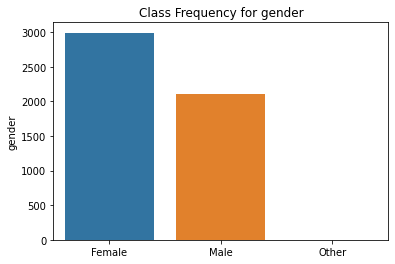

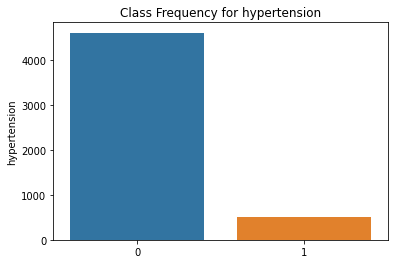

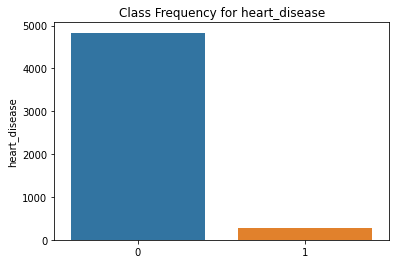

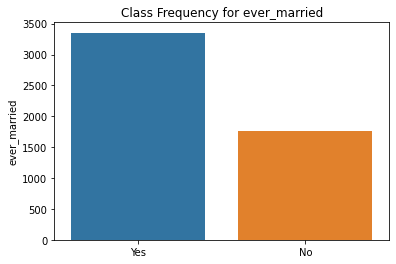

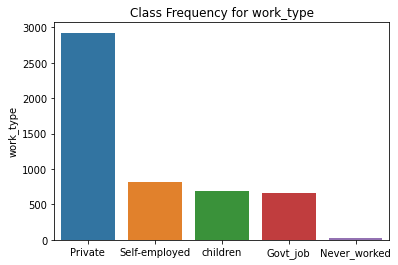

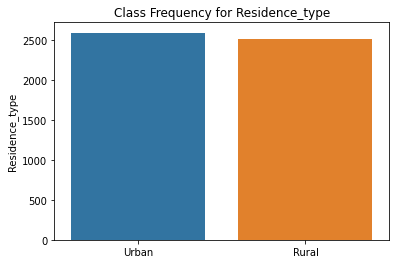

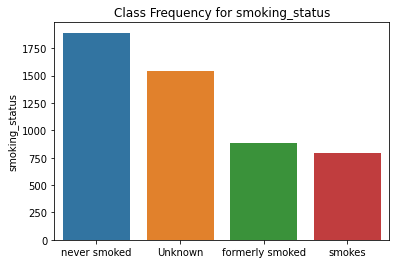

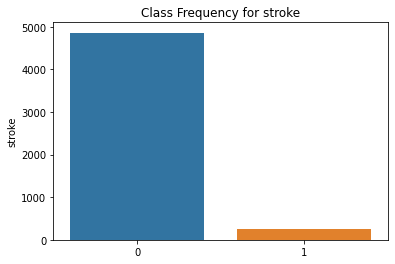

In [25]:
# For the categorical/boolean features, I will plan to plot these as frequency bar plots
for col in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
  df_temp = df[col].value_counts().to_frame()
  #print(df_temp)
  fig, ax = plt.subplots()
  sns.barplot(x = df_temp.index, y = df_temp[col], ax = ax)
  ax.set_title(f'Class Frequency for {col}')

**Interpretation:**

Many of these features have significant class imbalances. Specifically, 'other' in gender, 1 for hypertension, 1 for heart_disease, 'Never_worked' for work_type, and 1 for stroke. This should be kept in mind when modeling especially since the target to predict is 1 for stroke. 

In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


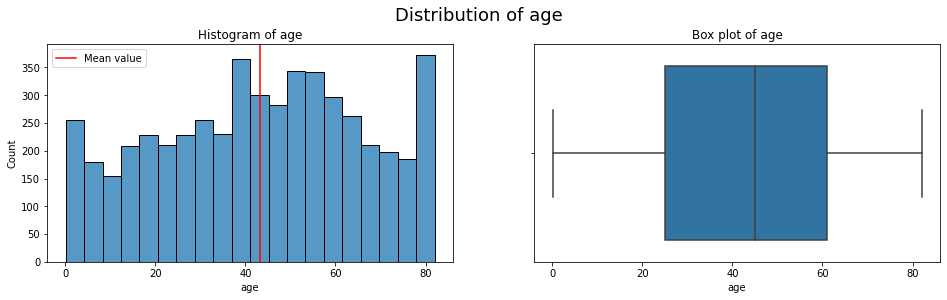

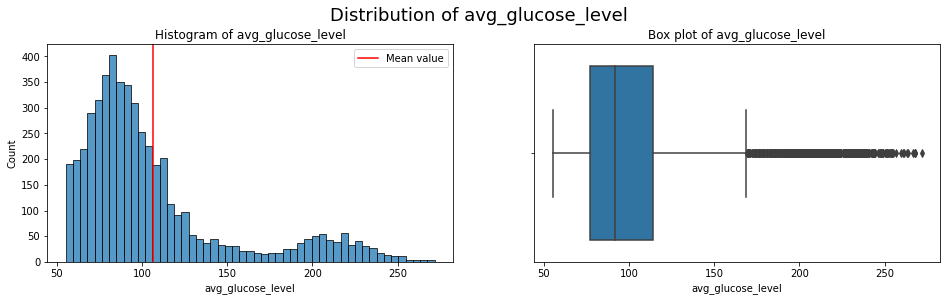

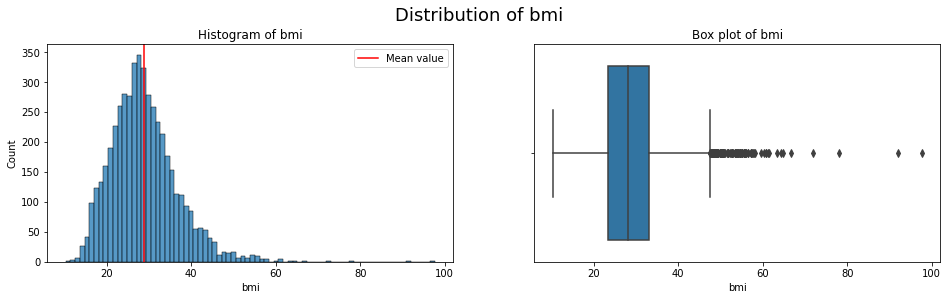

In [42]:
# Univariate plots for numeric columns
for col in ['age', 'avg_glucose_level', 'bmi']:
  fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (16, 4));
  sns.histplot(x = df[col], ax = axes[0]);
  axes[0].set_title(f'Histogram of {col}')
  axes[0].axvline(x = df[col].mean(), label = 'Mean value', c = 'red')
  axes[0].legend()
  sns.boxplot(x = df[col], ax = axes[1]);
  axes[1].set_title(f'Box plot of {col}')
  fig.suptitle(f'Distribution of {col}', fontsize = 18, y = 1.01);

**Interpretation:**
- Age appears to be mostly evenly distributed with a slight uptick for the oldest age range bin. There are slightly more instances in the 36-65 year range. 
- avg_glucose_level appears to have a bimodal distribution. There appears to be a peak around 78 and 220. The boxplot labeled the second mode, to be entirely outliers as this outlier detection technique assumes a near-normal distribution.
- BMI appears to be have a normal distribution, however, there is a long tail towards the largest values. These values have been correctly identified as outliers. 